In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def preprocess_data(data):
    data['Close'] = data['Close'].astype(str).str.replace(',', '').astype(float)
    data['Volume'] = data['Volume'].astype(str).str.replace(',', '').astype(float)
    return data

def create_sequences(data, N, M):
    X, y = [], []
    for i in range(len(data) - N - M + 1):
        X.append(data[i:i+N, :])   
        y.append(data[i+N:i+N+M, 3])  
    return np.array(X), np.array(y)

train_data = pd.read_csv("C:/Users/Chintan/OneDrive/Desktop/Trimester-3/Deep Learning/Assignment-3/dataset/Google_Stock_Price_Train.csv")
test_data = pd.read_csv("C:/Users/Chintan/OneDrive/Desktop/Trimester-3/Deep Learning/Assignment-3/dataset/Google_Stock_Price_Test.csv")


train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data[['Open', 'High', 'Low', 'Close', 'Volume']])

N = 30 
M = 1   

X_train, y_train = create_sequences(scaled_train_data, N, M)
X_train.shape, y_train.shape


((1228, 30, 5), (1228, 1))

In [2]:
scaled_test_data = scaler.transform(test_data[['Open', 'High', 'Low', 'Close', 'Volume']])

def create_sequences_with_adjusted_N(data, N, M):
    X, y = [], []
    for i in range(len(data) - N - M + 1):
        X.append(data[i:i+N, :])   
        y.append(data[i+N:i+N+M, 3])
    return np.array(X), np.array(y)

N_test = 10
X_test, y_test = create_sequences_with_adjusted_N(scaled_test_data, N_test, M)

X_test.shape, y_test.shape

((10, 10, 5), (10, 1))

C:\Users\Chintan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 0.0510 - val_loss: 0.0026
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0067 - val_loss: 0.0041
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0072 - val_loss: 6.1692e-04
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0054 - val_loss: 8.1544e-04
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0043 - val_loss: 5.0019e-04
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0041 - val_loss: 8.1780e-04
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0041 - val_loss: 7.0386e-04
Epoch 9/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0046 - val_loss: 5.2713e-04
Epoch 10/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 11/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0031 - val_loss: 7.1552e-04
Epoch 12/30
31/31 ━━━━━━━━━━━━━━━━

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013
Training Loss: 0.0015046455664560199
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


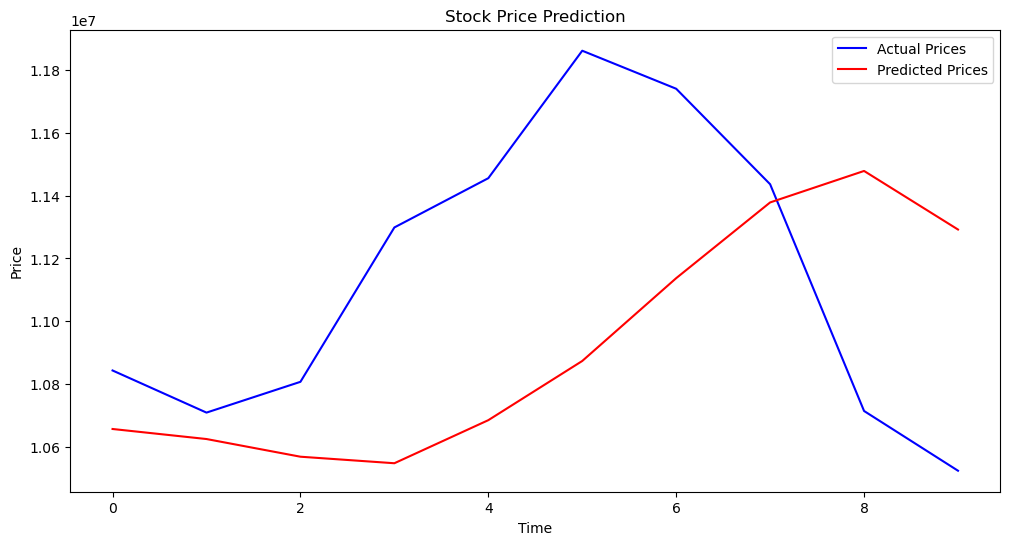

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=25),
        Dense(units=1) 
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])  

model = build_lstm_model(input_shape)

history = model.fit(
    X_train, y_train,
    epochs=30,  
    batch_size=32,
    validation_split=0.2  
)

model.save('lstm_stock_prediction_model.h5')

train_loss = model.evaluate(X_train, y_train)
print("Training Loss:", train_loss)

predictions = model.predict(X_test)

predicted_prices = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), 4)), predictions)))[:, -1]
actual_prices = scaler.inverse_transform(np.hstack((np.zeros((len(y_test), 4)), y_test)))[:, -1]

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Prices", color="blue")
plt.plot(predicted_prices, label="Predicted Prices", color="red")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


Reloading Tuner from hyperparameter_tuning\lstm_stock_prediction\tuner0.json
Best units: 100
Best dense units: 10
Best learning rate: 0.001
Epoch 1/20


C:\Users\Chintan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0407 - val_loss: 0.0028
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0042 - val_loss: 0.0059
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0060 - val_loss: 5.1851e-04
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0047 - val_loss: 0.0017
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0039 - val_loss: 4.6074e-04
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0026 - val_loss: 6.3288e-04
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0027 - val_loss: 6.1702e-04
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0048 - val_loss: 5.9128e-04
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - 

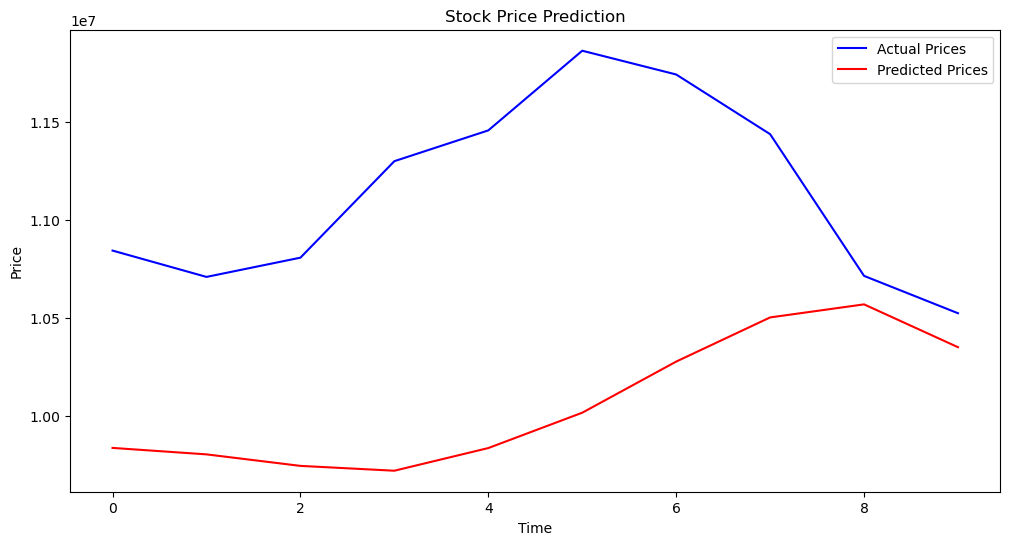

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import keras_tuner as kt

def model_builder(hp):
    model = Sequential()
    hp_units = hp.Int('units', min_value=25, max_value=100, step=25)
    model.add(LSTM(units=hp_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=hp_units, return_sequences=False))
    model.add(Dropout(0.2))
    hp_dense_units = hp.Int('dense_units', min_value=10, max_value=50, step=10)
    model.add(Dense(units=hp_dense_units))
    model.add(Dense(1))  
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error')
    return model

tuner = kt.Hyperband(
    model_builder,
    objective='val_loss',
    max_epochs=10,  
    factor=3,
    directory='hyperparameter_tuning',
    project_name='lstm_stock_prediction'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units: {best_hps.get('units')}")
print(f"Best dense units: {best_hps.get('dense_units')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), 4)), predictions)))[:, -1]
actual_prices = scaler.inverse_transform(np.hstack((np.zeros((len(y_test), 4)), y_test)))[:, -1]

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Prices", color="blue")
plt.plot(predicted_prices, label="Predicted Prices", color="red")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
